In [2]:
import numpy as np
from envs.merged import PointMazeEnv
import os
import imageio
from IPython.display import Video

# Set the Mujoco OpenGL renderer to EGL for headless rendering compatibility
os.environ["MUJOCO_GL"] = "egl"

In [3]:
data = np.load("datasets/pointmaze_eps50_T100_vm_k5_lvl3_0.npz")
data.files

['obs', 'act', 'frames']

In [4]:
data["obs"].shape

(200, 101, 4)

In [5]:
data["frames"][0, -1, :, :, :].shape, data["frames"][1, 0, :, :, :].shape

((224, 224, 3), (224, 224, 3))

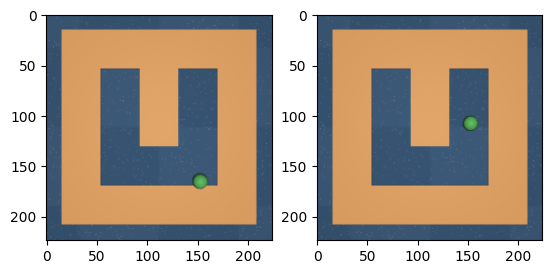

In [6]:
# plot the two frames
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(data["frames"][0, -1, :, :, :])
plt.subplot(1, 2, 2)
plt.imshow(data["frames"][1, 0, :, :, :])
plt.show()

---

In [7]:
import json

with open("datasets/maze_bank_train.json", "r") as f:
    mazes = json.load(f)

In [20]:
random_idx = np.random.randint(len(mazes['maps']))
maze_map = mazes['maps'][random_idx]
side = max(len(maze_map), len(maze_map[0]))
env = PointMazeEnv(
    maze_map=maze_map,
    # camera_distance=side,
    render_goal=False
)
env.reset()

({'observation': array([-1.36608488,  0.56980145,  0.        ,  0.        ]),
  'achieved_goal': array([-1.36608488,  0.56980145]),
  'desired_goal': array([-0.6318058 ,  1.65073577])},
 {'success': False})

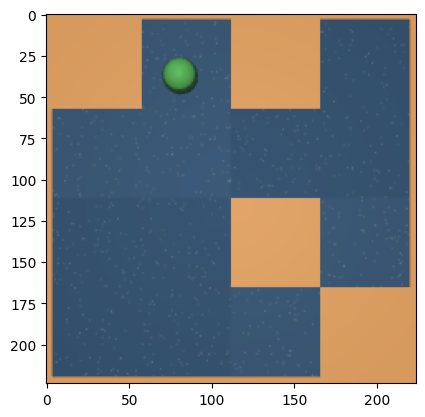

In [21]:
# Render initial frame and plot it
initial_frame = env.render()
plt.imshow(initial_frame)
plt.show()

---

In [1]:
from src.data.dataset import PointMazeTransitions

In [2]:
dataset = PointMazeTransitions(
    path = "data/test.npz"
)

In [7]:
dataset[0]

{'obs': tensor([-0.7417, -0.3434,  0.0000,  0.0000]),
 'act': tensor([0.5692, 0.8938]),
 'next_obs': tensor([-0.7404, -0.3412,  0.1356,  0.2129]),
 'frame': tensor([[[ 54,  82, 110],
          [ 54,  82, 110],
          [ 54,  82, 110],
          ...,
          [ 49,  77, 104],
          [ 49,  77, 104],
          [ 49,  77, 104]],
 
         [[ 54,  82, 110],
          [ 54,  82, 110],
          [ 55,  82, 110],
          ...,
          [ 50,  77, 105],
          [ 49,  77, 104],
          [ 49,  77, 104]],
 
         [[ 54,  82, 110],
          [ 55,  82, 110],
          [ 55,  82, 110],
          ...,
          [ 53,  79, 107],
          [ 54,  80, 107],
          [ 50,  77, 105]],
 
         ...,
 
         [[ 49,  77, 104],
          [ 50,  77, 105],
          [ 50,  77, 105],
          ...,
          [ 55,  82, 110],
          [ 55,  82, 110],
          [ 54,  82, 110]],
 
         [[ 49,  77, 104],
          [ 52,  79, 105],
          [ 51,  78, 105],
          ...,
          [ 